# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# The Dataset
> ***Brief Description:***
Teenage pregancy is an issue that is barely tackled yet affects most girls from any background. This project leverages the use of ML to help young girls that are at high risk of getting prematurely pregnant to reccomend online resources that they can use to learn more about the phases their bodies undergo hence raising concsienceness and decresing rates of teenage pregnancies.

The dataset used for this model is synthetic due to unavailability of non-generic Rwandan data online. The data includes key features like ***age ranges*** which helped determine ***educational levels***, ***family income*** that helped categorise the social economic classes recognised in Rwanda also commonly known as ***Ubudehe categories***, ***access to health care***, ***sexual education exposure***, and ***contraceptive use*** by different people from different Ubudehe categories. The dataset also includes columns for ***peer influence***, ***parental involvement***, and ***community resources** for proper generation of ***Risk category*** as the target variable.


In [2]:
file_path = 'teenage_pregnancies_in_Rwanda_data.csv'

#Load the data
data = pd.read_csv(file_path)

In [3]:
data

,Age,Education_Level,Ubudehe_Category,Family_Income_Rwf,Healthcare_Access_Score,Sexual_Education_Hours,Contraceptive_Use,Peer_Influence,Parental_Involvement,Community_Resources,Risk_Category
0,17,O'Level,C,39000.0,34,8.7,Never,49,39,33,Medium
1,16,Primary,B,359000.0,80,1.0,Never,81,63,67,Low
2,17,O'Level,C,57000.0,69,4.4,Never,81,54,58,Low
3,18,A'Level,C,40000.0,35,34.1,Regular,76,41,46,Low
4,16,Primary,D,11000.0,42,1.5,Never,38,62,25,Medium
...,...,...,...,...,...,...,...,...,...,...,...
995,16,Primary,D,30000.0,33,1.0,Never,55,49,35,Medium
996,19,O'Level,C,65000.0,57,6.3,Inconsistent,94,47,52,Low
997,17,O'Level,D,14000.0,37,2.8,Never,47,48,44,Medium
998,15,Primary,E,9000.0,18,1.1,Never,33,51,35,Medium


In [4]:
print("Sample of generated data:")
print(data)

print("\nSummary statistics:")
print(data.describe())

print("\nValue counts for categorical variables:")
print("\nEducation Level distribution:")
print(data['Education_Level'].value_counts())
print("\nUbudehe Category distribution:")
print(data['Ubudehe_Category'].value_counts())
print("\nContraceptive Use distribution:")
print(data['Contraceptive_Use'].value_counts())
print("\nRisk Category distribution:")
print(data['Risk_Category'].value_counts())

# Calculate average risk factors by different demographic factors
print("\nAverage risk category distribution by Ubudehe category:")
print(data.groupby('Ubudehe_Category')['Risk_Category'].value_counts(normalize=True))

Sample of generated data:
     Age Education_Level Ubudehe_Category  Family_Income_Rwf  \
0     17         O'Level                C            39000.0   
1     16         Primary                B           359000.0   
2     17         O'Level                C            57000.0   
3     18         A'Level                C            40000.0   
4     16         Primary                D            11000.0   
..   ...             ...              ...                ...   
995   16         Primary                D            30000.0   
996   19         O'Level                C            65000.0   
997   17         O'Level                D            14000.0   
998   15         Primary                E             9000.0   
999   17         O'Level                B           485000.0   

     Healthcare_Access_Score  Sexual_Education_Hours Contraceptive_Use  \
0                         34                     8.7             Never   
1                         80                     1.0     

In [5]:
# dividing the dataset into Train, Validation, and test sets

X = data.drop('Risk_Category', axis=1)
y = data['Risk_Category']

# For the categorical features
X = pd.get_dummies(X, columns=['Education_Level', 'Ubudehe_Category', 'Contraceptive_Use'])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [6]:
# one-hot encoding for the risk categories

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# one-hot encoding for the risk categories
y_train = tf.keras.utils.to_categorical(y_train_encoded, num_classes=3)
y_val = tf.keras.utils.to_categorical(y_val_encoded, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```

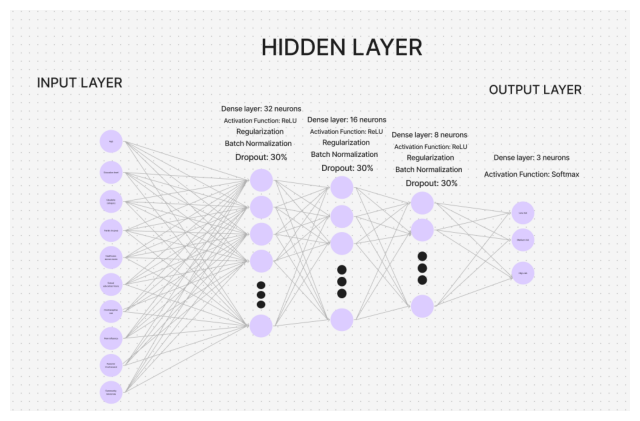

In [7]:
from PIL import Image
import matplotlib.image as mpimg

image_path = "Model_Structure.png" 
img = mpimg.imread(image_path)

plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

#Task: Define a function that creates models without and With specified Optimization techniques


In [8]:
def define_model(optimization: str, regularization_type: str = None, regularization_strength: float = 0.0, early_stopping: bool = False, learning_rate: float = False):
    # Initialize the model
    model = Sequential()

    def get_regularizer(reg_type, reg_strength):
        if reg_type == 'l1':
            return l1(reg_strength) if reg_strength > 0 else None
        elif reg_type == 'l2':
            return l2(reg_strength) if reg_strength > 0 else None
        elif reg_type == 'l1_l2':
            return l1_l2(l1=reg_strength, l2=reg_strength) if reg_strength > 0 else None
        else:
            return None

    # First dense layer with optional L2 regularization
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],),
                    kernel_regularizer=get_regularizer(regularization_type, regularization_strength)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Second dense layer
    model.add(Dense(16, activation='relu',
                    kernel_regularizer=get_regularizer(regularization_type, regularization_strength)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Third dense layer
    model.add(Dense(8, activation='relu',
                    kernel_regularizer=get_regularizer(regularization_type, regularization_strength)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Output layer with 3 neurons for multi-class classification
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimization,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Define callbacks for early stopping if required
    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True))

    return model, callbacks

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [17]:
def loss_curve_plot(history, y_test=None, y_pred=None):
    epochs = range(1, len(history.history['loss']) + 1)

    train_accuracy = history.history.get('accuracy', history.history.get('acc'))
    val_accuracy = history.history.get('val_accuracy', history.history.get('val_acc'))

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, history.history['loss'], 'bo-', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'r-', label='Validation loss')
    plt.title('Training and Validation Loss', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Final Training Accuracy: {train_accuracy[-1]:.4f}")
    print(f"Final Validation Accuracy: {val_accuracy[-1]:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Low Risk', 'Medium Risk', 'High Risk']))

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.3829 - loss: 1.3809 - val_accuracy: 0.5050 - val_loss: 1.0703
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5034 - loss: 1.1281 - val_accuracy: 0.7650 - val_loss: 0.9232
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5721 - loss: 0.9863 - val_accuracy: 0.8450 - val_loss: 0.7917
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6479 - loss: 0.8339 - val_accuracy: 0.8850 - val_loss: 0.6867
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6930 - loss: 0.7852 - val_accuracy: 0.9100 - val_loss: 0.5996
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7342 - loss: 0.6914 - val_accuracy: 0.9300 - val_loss: 0.5246
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7461 - loss: 0.6510 - val_accuracy: 0.9500 - val_loss: 0.4648
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7864 - loss: 0.6157 - val_accuracy: 

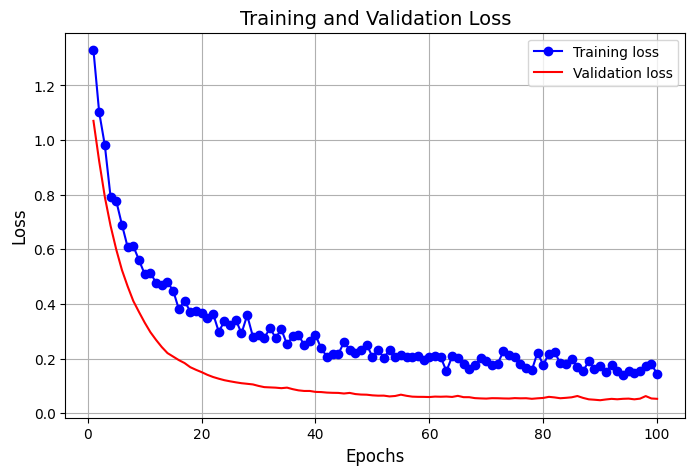

Final Training Accuracy: 0.9483
Final Validation Accuracy: 0.9900

Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.00      0.00      0.00         2
 Medium Risk       0.99      1.00      0.99        82
   High Risk       0.98      0.99      0.99       116

    accuracy                           0.98       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.98      0.98      0.98       200



c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

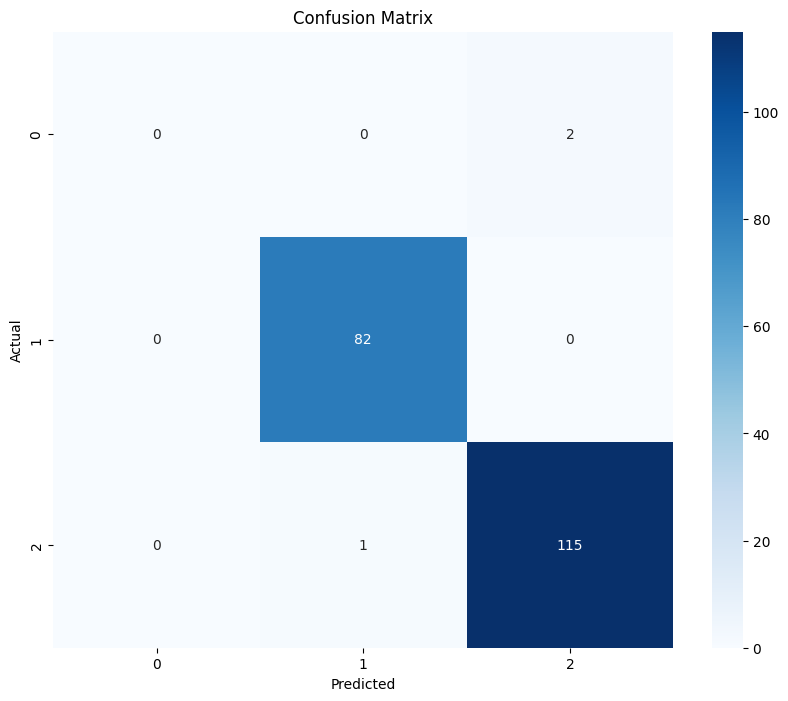

In [38]:
# Default model (No optimization techniques)

default_model, _ = define_model(
    optimization='adam',
    regularization_type=None,
    regularization_strength=0.0,
    early_stopping=False,
    learning_rate=0.01
)

history = default_model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1,
)

y_test_labels = np.argmax(y_test, axis=1)
y_pred = np.argmax(default_model.predict(X_test), axis=1)
loss_curve_plot(history, y_test_labels, y_pred)

#confusion matrix
import seaborn as sns

cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

default = 'saved_models/default_model.h5'
default_model.save(default)

c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.4239 - loss: 12.3387 - val_accuracy: 0.6500 - val_loss: 11.4402
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4769 - loss: 11.5072 - val_accuracy: 0.7500 - val_loss: 10.6756
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4947 - loss: 10.7076 - val_accuracy: 0.7750 - val_loss: 9.9636
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5964 - loss: 9.9769 - val_accuracy: 0.8300 - val_loss: 9.2744
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5945 - loss: 9.2862 - val_accuracy: 0.8000 - val_loss: 8.6099
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6222 - loss: 8.6545 - val_accuracy: 0.7800 - val_loss: 7.9669
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6693 - loss: 7.9398 - val_accuracy: 0.7750 - val_loss: 7.3508
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7064 - loss: 7.2926 - val_accurac

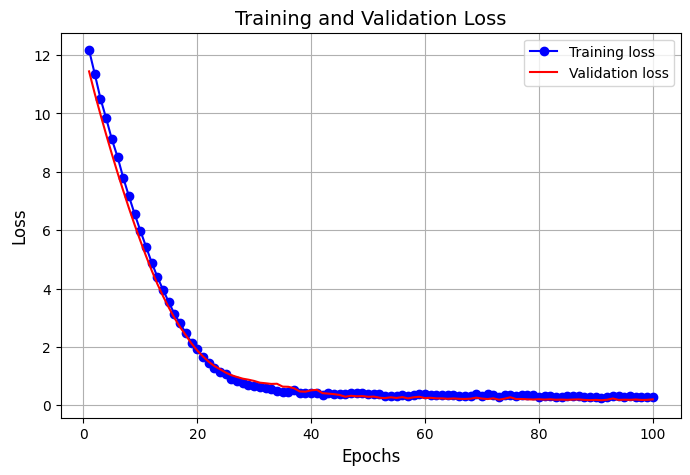

Final Training Accuracy: 0.9433
Final Validation Accuracy: 0.9600

Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.00      0.00      0.00         2
 Medium Risk       0.98      0.99      0.98        82
   High Risk       0.97      0.98      0.98       116

    accuracy                           0.97       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.97      0.97      0.97       200



c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

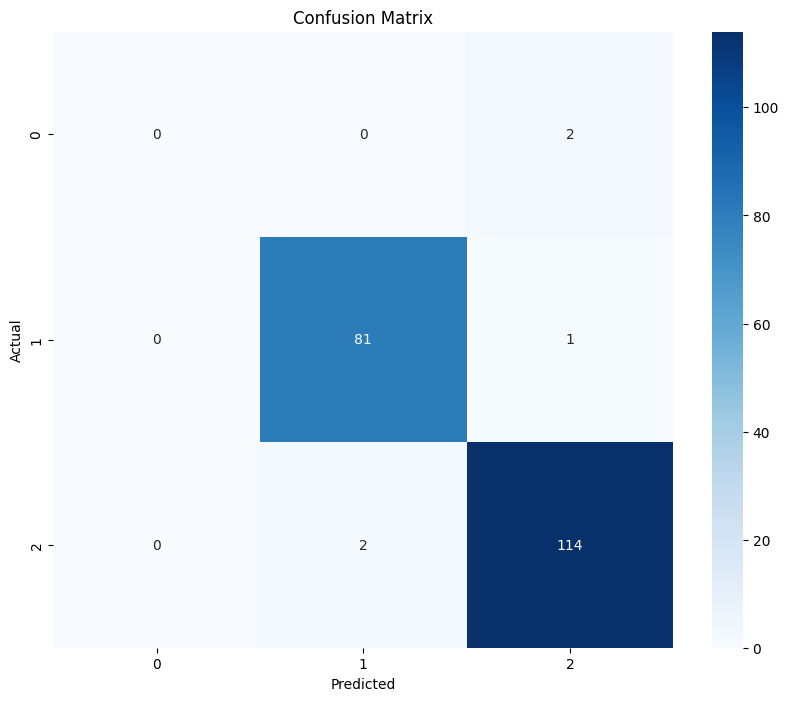

In [22]:
# Neural network model 1

nn_model_1, callbacks = define_model(
    optimization='adam',
    regularization_type='l1',
    regularization_strength=0.05,
    early_stopping=True,
    learning_rate=0.001
)

history = nn_model_1.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

y_test_labels = np.argmax(y_test, axis=1)
y_pred = np.argmax(nn_model_1.predict(X_test), axis=1)
loss_curve_plot(history, y_test_labels, y_pred)

#confusion matrix
import seaborn as sns

cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

model_1 = 'saved_models/nn_model_1.h5'
nn_model_1.save(model_1)

c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.2497 - loss: 6.9612 - val_accuracy: 0.5100 - val_loss: 5.8332
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3634 - loss: 6.1222 - val_accuracy: 0.5400 - val_loss: 5.3821
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4113 - loss: 5.6898 - val_accuracy: 0.6600 - val_loss: 5.0100
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4908 - loss: 5.1643 - val_accuracy: 0.6800 - val_loss: 4.6987
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4820 - loss: 4.8370 - val_accuracy: 0.7000 - val_loss: 4.4044
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5609 - loss: 4.4669 - val_accuracy: 0.7300 - val_loss: 4.1204
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5790 - loss: 4.1574 - val_accuracy: 0.7500 - val_loss: 3.8472
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6203 - loss: 3.7972 - val_accuracy: 0.

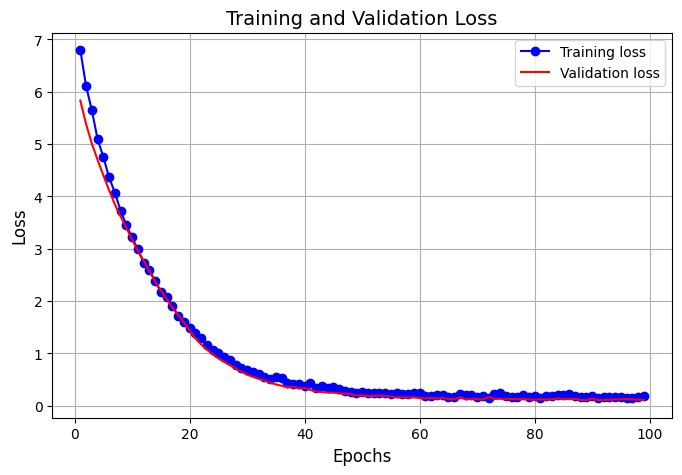

Final Training Accuracy: 0.9617
Final Validation Accuracy: 0.9750

Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.00      0.00      0.00         2
 Medium Risk       0.99      0.99      0.99        82
   High Risk       0.97      0.99      0.98       116

    accuracy                           0.98       200
   macro avg       0.65      0.66      0.66       200
weighted avg       0.97      0.98      0.98       200



c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

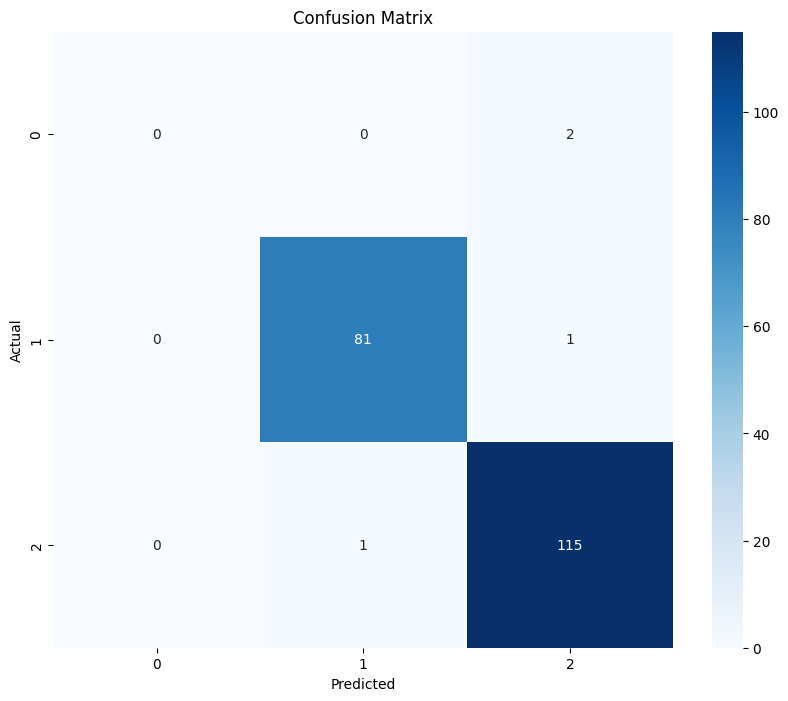

In [23]:
# Neural network model 2

nn_model_2, callbacks = define_model(
    optimization='adam',
    regularization_type='l2',
    regularization_strength=0.09,
    early_stopping=True,
    learning_rate=0.001
)

history = nn_model_2.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

y_test_labels = np.argmax(y_test, axis=1)
y_pred = np.argmax(nn_model_2.predict(X_test), axis=1)
loss_curve_plot(history, y_test_labels, y_pred)

#confusion matrix
import seaborn as sns

cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

model_2 = 'saved_models/nn_model_2.h5'
nn_model_2.save(model_2)

Epoch 1/100


c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.3628 - loss: 106.1972 - val_accuracy: 0.4350 - val_loss: 95.3176
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3952 - loss: 92.8506 - val_accuracy: 0.5700 - val_loss: 84.7407
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4450 - loss: 82.4560 - val_accuracy: 0.5800 - val_loss: 74.9911
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.4223 - loss: 72.8697 - val_accuracy: 0.5650 - val_loss: 65.9181
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4791 - loss: 63.9229 - val_accuracy: 0.5400 - val_loss: 57.4578
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4616 - loss: 55.6384 - val_accuracy: 0.5300 - val_loss: 49.6951
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5168 - loss: 47.9486 - val_accuracy: 0.4650 - val_loss: 42.5261
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5598 - loss: 40.8302 - val_accuracy

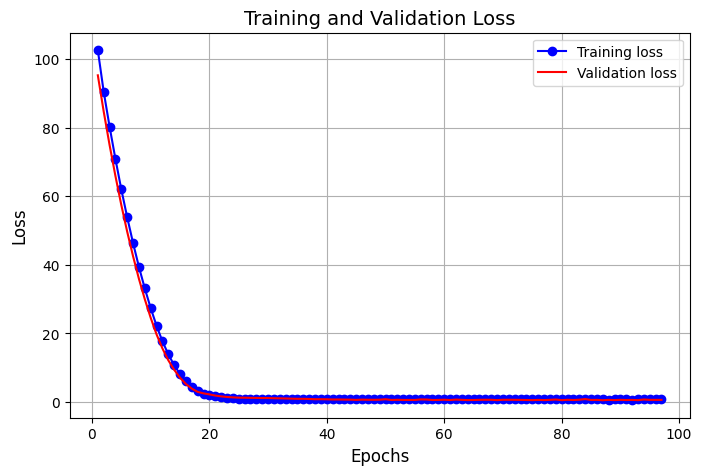

Final Training Accuracy: 0.9050
Final Validation Accuracy: 0.9350

Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.00      0.00      0.00         2
 Medium Risk       0.94      1.00      0.97        82
   High Risk       0.98      0.96      0.97       116

    accuracy                           0.96       200
   macro avg       0.64      0.65      0.65       200
weighted avg       0.96      0.96      0.96       200



c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

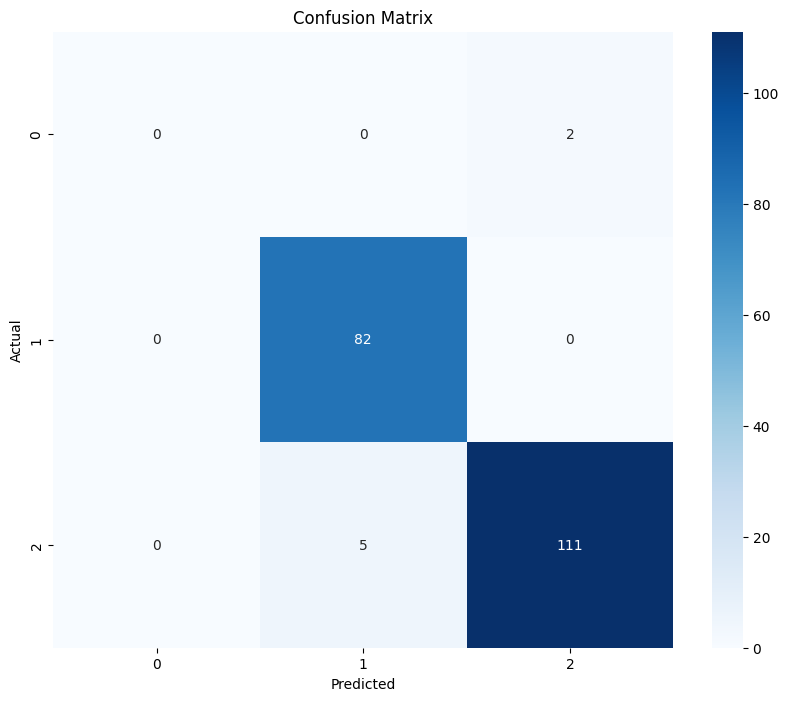

In [24]:
# Neural network model 3

nn_model_3, callbacks = define_model(
    optimization='RMSProp',
    regularization_type='l1',
    regularization_strength=0.5,
    early_stopping=True,
    learning_rate=0.001
)

history = nn_model_3.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

y_test_labels = np.argmax(y_test, axis=1)
y_pred = np.argmax(nn_model_3.predict(X_test), axis=1)
loss_curve_plot(history, y_test_labels, y_pred)

#confusion matrix
import seaborn as sns

cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

model_3 = 'saved_models/nn_model_3.h5'
nn_model_3.save(model_3)

c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.3514 - loss: 28.8456 - val_accuracy: 0.7050 - val_loss: 25.1540
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4493 - loss: 24.4848 - val_accuracy: 0.8450 - val_loss: 21.2377
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5739 - loss: 20.4506 - val_accuracy: 0.8550 - val_loss: 17.7695
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6327 - loss: 16.9912 - val_accuracy: 0.8800 - val_loss: 14.6713
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7066 - loss: 13.9745 - val_accuracy: 0.9150 - val_loss: 11.9532
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7208 - loss: 11.2497 - val_accuracy: 0.9200 - val_loss: 9.5714
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7822 - loss: 8.8594 - val_accuracy: 0.9550 - val_loss: 7.5360
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8331 - loss: 6.8820 - val_a

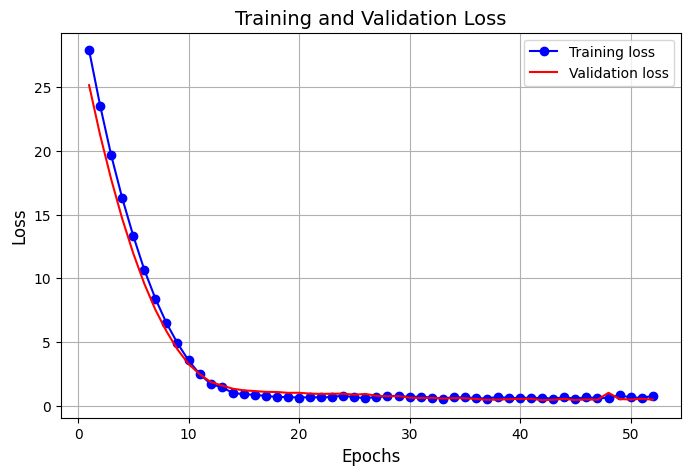

Final Training Accuracy: 0.8633
Final Validation Accuracy: 0.9500

Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.00      0.00      0.00         2
 Medium Risk       0.96      0.96      0.96        82
   High Risk       0.96      0.97      0.97       116

    accuracy                           0.96       200
   macro avg       0.64      0.65      0.64       200
weighted avg       0.95      0.96      0.96       200



c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\summative_intro_to_ml\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

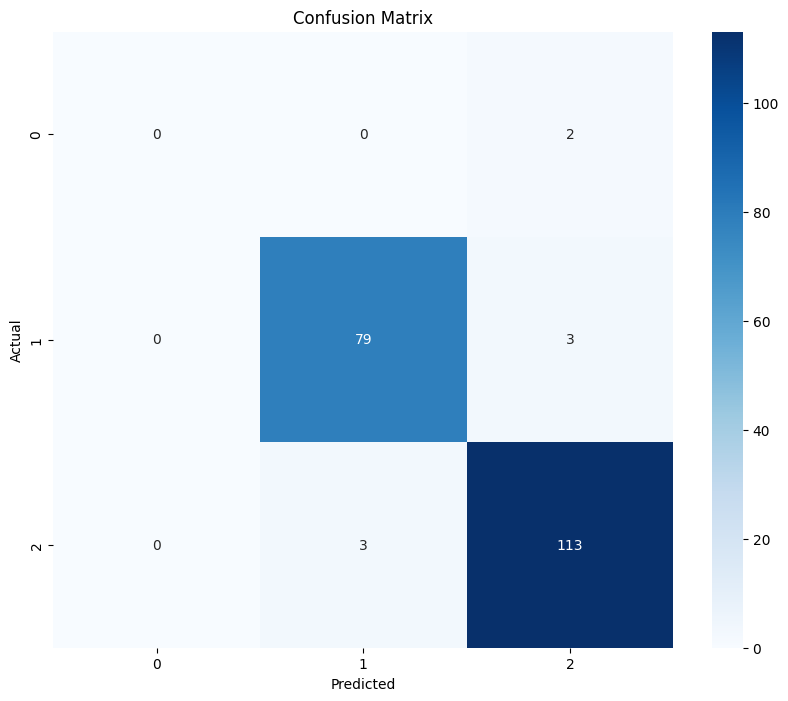

In [25]:
# Neural network model 4

nn_model_4, callbacks = define_model(
    optimization='sgd',
    regularization_type='l1_l2',
    regularization_strength=0.1,
    early_stopping=True,
    learning_rate=0.001
)

history = nn_model_4.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

y_test_labels = np.argmax(y_test, axis=1)
y_pred = np.argmax(nn_model_4.predict(X_test), axis=1)
loss_curve_plot(history, y_test_labels, y_pred)

#confusion matrix
import seaborn as sns

cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

model_4 = 'saved_models/nn_model_4.h5'
nn_model_4.save(model_4)

In [28]:
# Traditional ml algorithm: SVM
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

def svm_model(X_train, y_train, X_test, y_test):
  # one-hot encoding
  y_train = np.argmax(y_train, axis=1)
  y_test = np.argmax(y_test, axis=1)

  model = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
  model.fit(
      X_train, y_train
  )

  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Model Accuracy: {accuracy:.2f}")
  return model

svm_model(X_train, y_train, X_test, y_test)

Model Accuracy: 0.94


SVC(random_state=42)

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [36]:
def make_predictions(model, X_test):
    # Load the model
    loaded_model = tf.keras.models.load_model(model)

    # Make predictions
    predictions = loaded_model.predict(X_test)

    # Convert probabilities to binary labels (0 or 1)
    predictions = np.argmax(predictions, axis=1)

    return predictions

In [37]:
# Make predictions
loaded_model = 'saved_models/nn_model_4.h5'
predictions = make_predictions(loaded_model, X_test)
print(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
[1 1 2 2 2 2 1 2 1 1 2 2 2 2 2 2 2 1 1 2 1 2 1 2 1 2 2 1 1 2 2 2 1 1 2 1 2
 2 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 2 1 2 2 1 1 1 2 1 1 2 2 1 2 1 2 1 2
 1 1 2 2 1 2 2 1 2 1 2 1 2 2 2 1 2 1 2 1 2 1 2 2 1 2 1 1 2 1 1 2 1 2 2 1 1
 1 2 1 1 2 1 2 1 2 1 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 1
 2 2 2 2 1 1 1 2 1 2 2 1 2 2 1 2 1 2 2 2 2 2 1 1 2 1 2 2 1 2 1 1 1 2 1 2 1
 1 1 1 1 2 2 2 2 2 1 2 2 2 2 1]


Congratulations!!
